In [1]:
# Import the neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
# Import Username,Password and Database_name
from config import Username,Password,DBname

ModuleNotFoundError: No module named 'config'

In [29]:
%matplotlib notebook

In [5]:
#!pip install psycopg2-binary

## Create Connection

In [25]:
# The create_engine() function produces an Engine object based on a URL
engine = create_engine('postgresql+psycopg2://postgres:'+ Password + '@localhost:5432/' + DBname)
connection = engine.connect()

### Create a dataframe from the table in database

In [26]:
# Create cardio dataframe from cardio data cleaned table in the database
cardio_df = pd.read_sql("SELECT * FROM cardio_data_cleaned",connection)
cardio_df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio
0,51.0,1.0,171.0,29.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0,1.0
1,49.0,1.0,160.0,30.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
2,58.0,1.0,143.0,30.0,103.0,61.0,2.0,1.0,0.0,0.0,1.0,0.0
3,47.0,2.0,170.0,31.0,150.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0
4,42.0,1.0,146.0,32.0,100.0,70.0,1.0,1.0,0.0,0.0,0.0,0.0


In [54]:
#df.groupby(['col5', 'col2']).size()
cholesterol_cardio_df = cardio_df.groupby(["cholesterol","gender"]).mean()
cholesterol_cardio_df.head()

age      height     weight  systolic_bp  \
cholesterol gender                                                  
1.0         1.0     52.386811  161.795745  71.261017   123.799909   
            2.0     52.181516  169.904207  75.978196   125.999075   
2.0         1.0     53.327695  160.643789  74.480564   128.893668   
            2.0     52.892466  170.578493  80.645005   133.166611   
3.0         1.0     55.823628  160.402077  77.236183   133.040245   

                    diastolic_bp   glucose    smoker  alcohol_intake  \
cholesterol gender                                                     
1.0         1.0        79.908099  1.097432  0.015803        0.020574   
            2.0        81.268056  1.102106  0.208839        0.096391   
2.0         1.0        82.167392  1.337522  0.024166        0.038505   
            2.0        84.488882  1.327912  0.273150        0.149353   
3.0         1.0        84.349036  1.949555  0.022626        0.037277   

                      active    cardio  
cholesterol gender                      
1.0         1.0     0.802067  0.429418  
            2.0     0.803189  0.443041  
2.0         1.0     0.793781  0.577896  
            2.0     0.806837  0.628609  
3.0         1.0     0.811573  0.766506

<IPython.core.display.Javascript object>


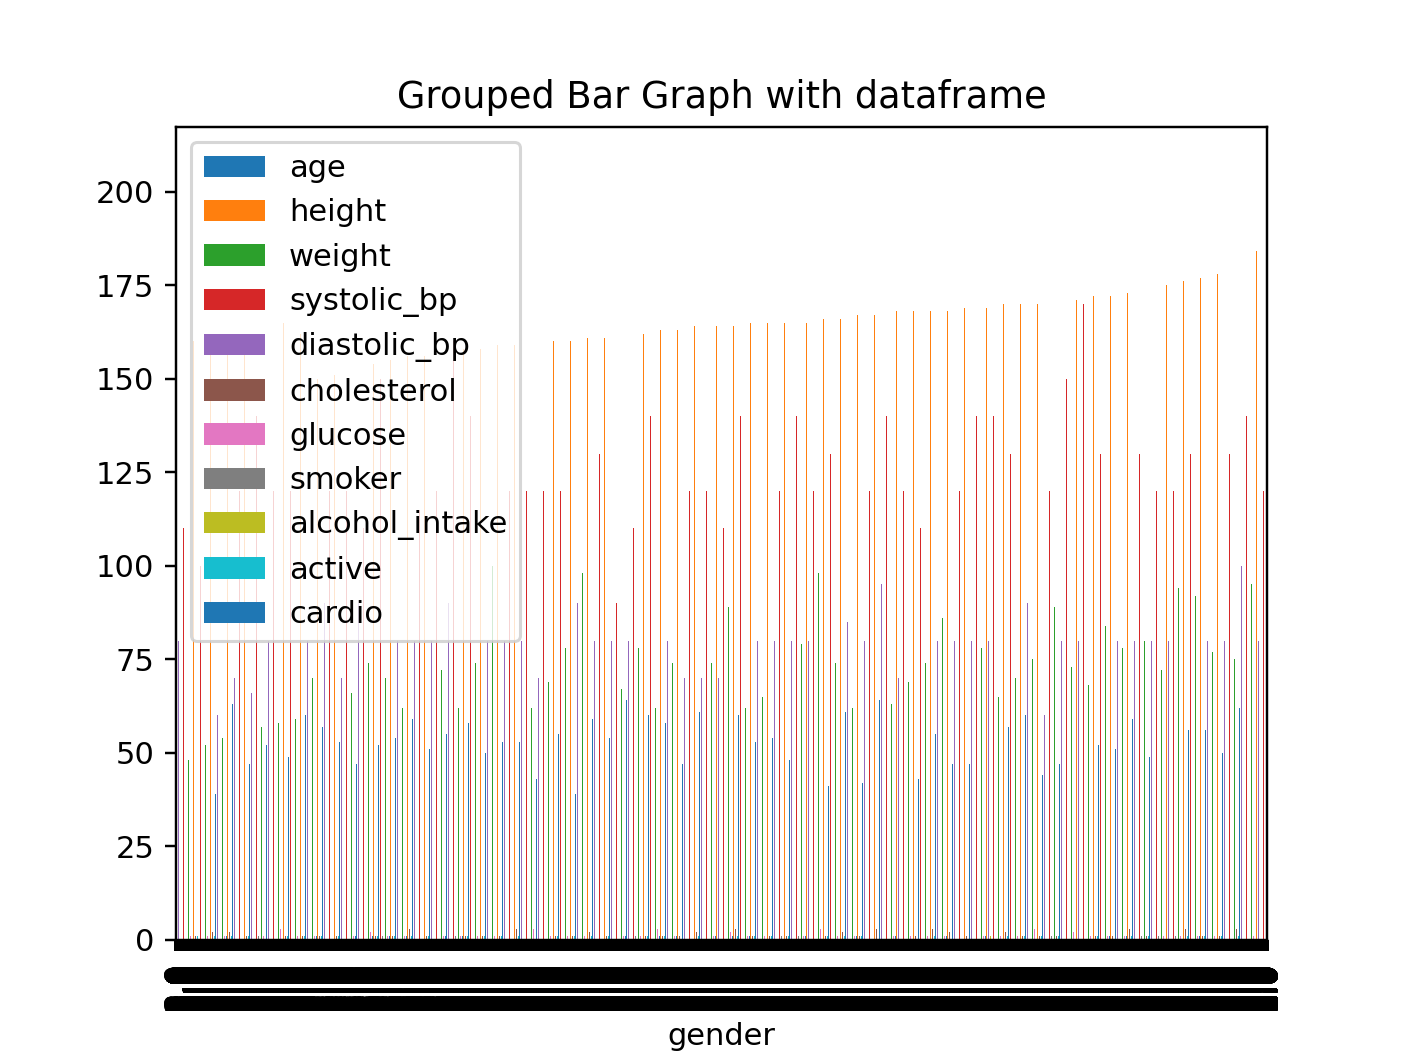

<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='gender'>

In [59]:
# plot grouped bar chart
cardio_df.plot(x='gender',
                kind='bar',
                stacked=False,
                title='Grouped Bar Graph with dataframe')

<IPython.core.display.Javascript object>


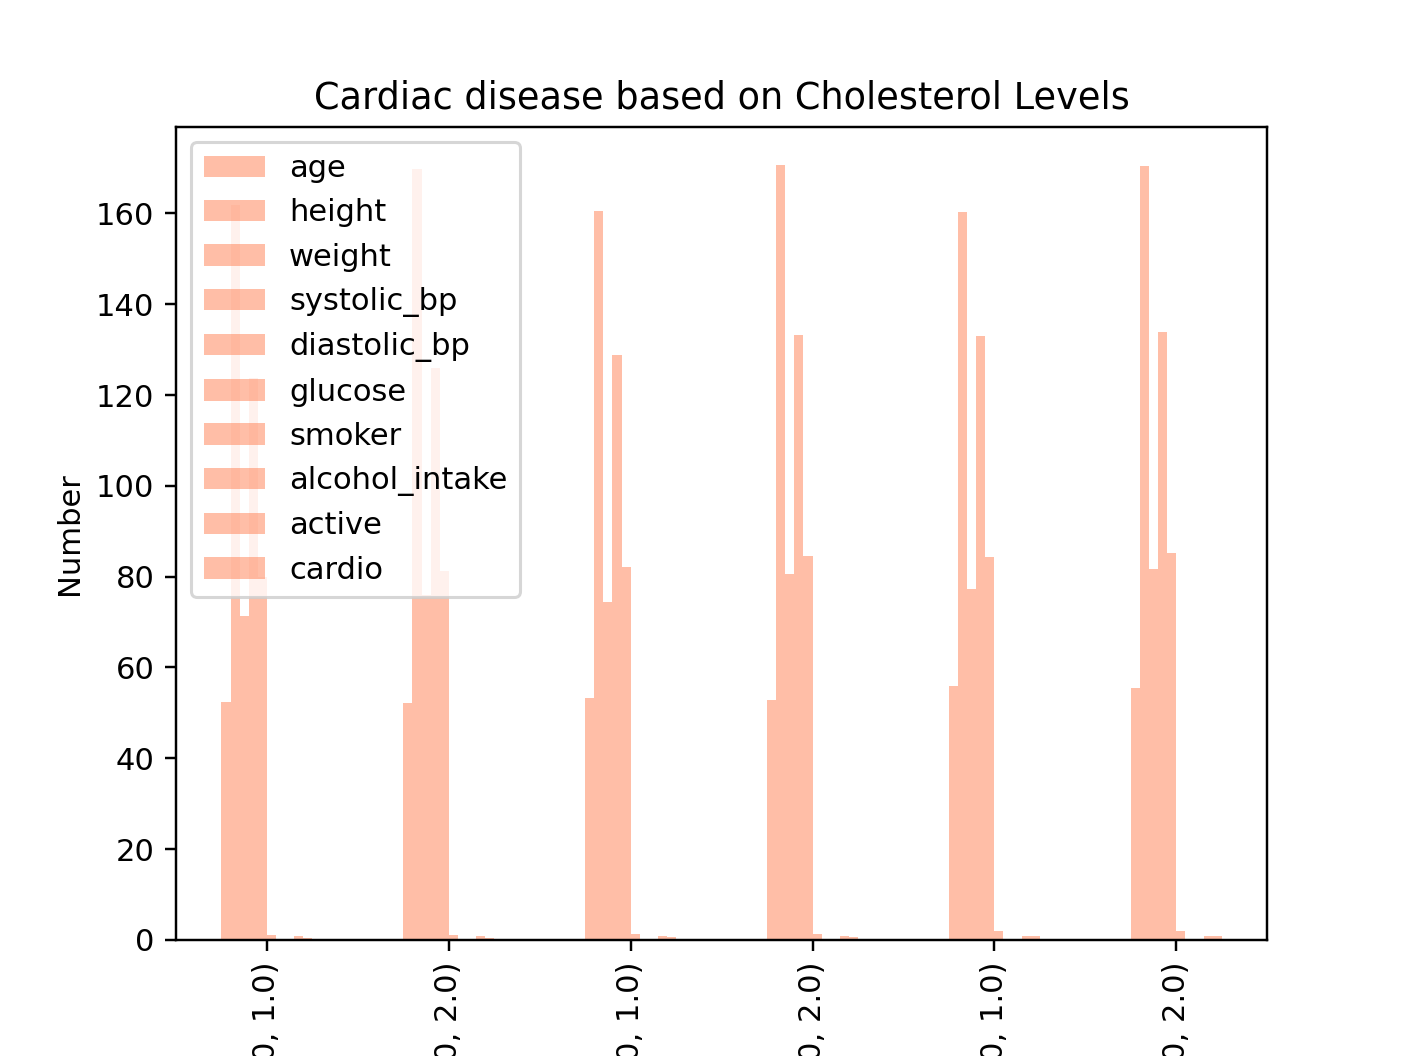

In [57]:
cholesterol_cardio_df.plot.bar(color='coral', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Cholesterol levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Cholesterol Levels")
# Add the legend.
plt.legend()

In [38]:
gender_cardio_df = cardio_df["cardio"].groupby(cardio_df["gender"]).mean()
gender_cardio_df.head()

gender
1.0    0.490967
2.0    0.497583
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


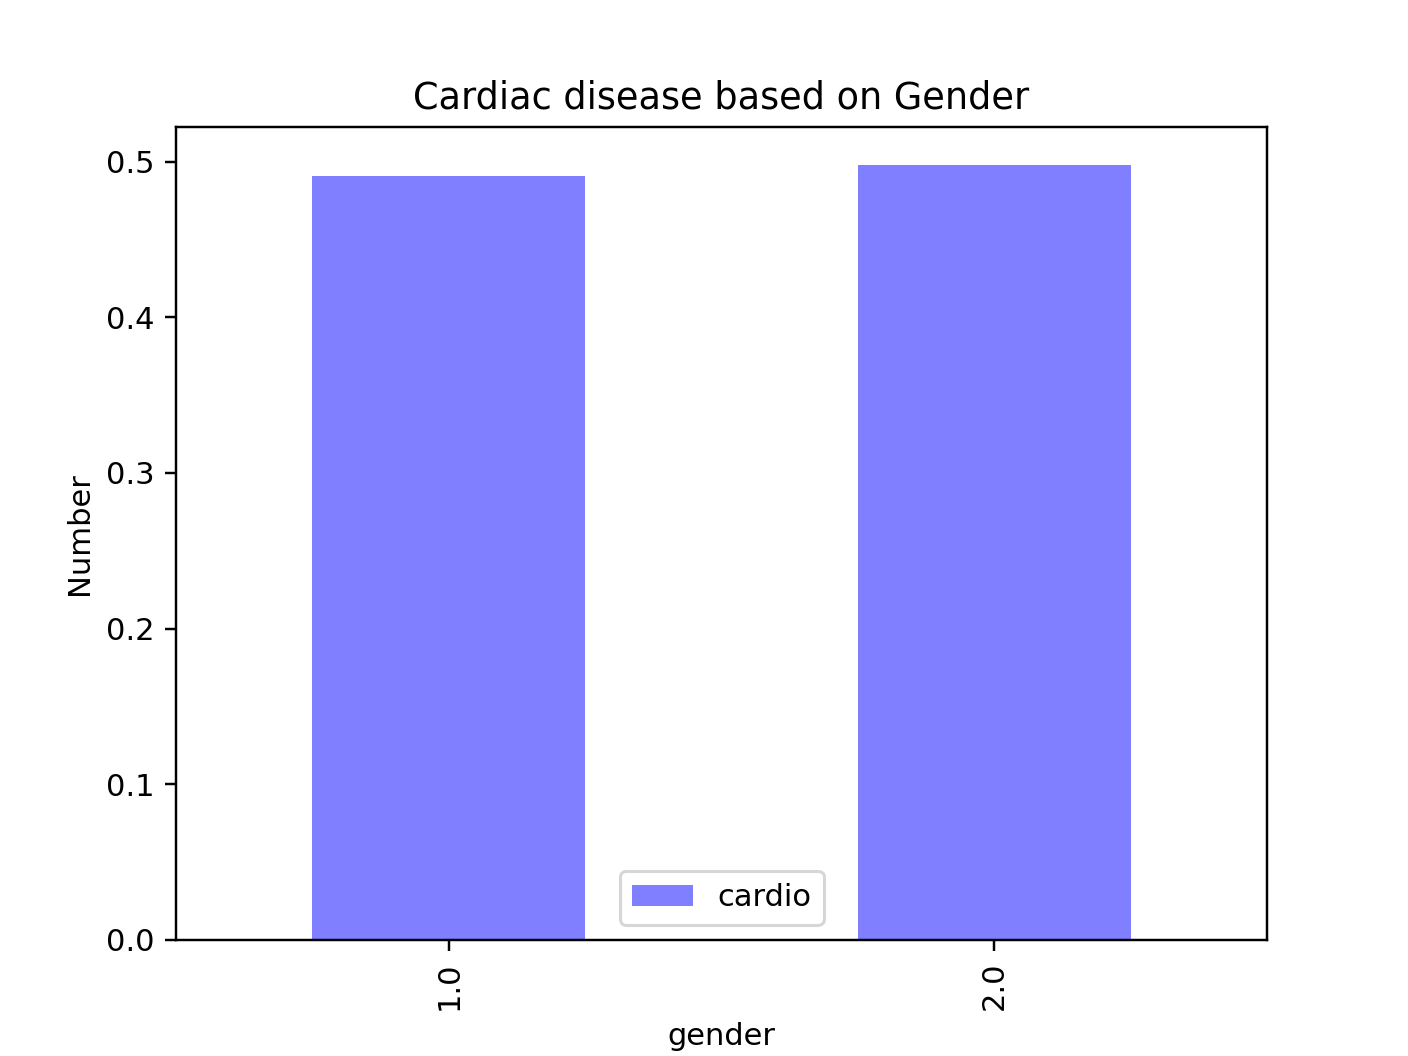

In [39]:
gender_cardio_df.plot.bar(color='blue', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("gender")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Gender")
# Add the legend.
plt.legend()